In [1]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM
import jinja2

import numpy as np
import sympy as sym

import panel as pn; import holoviews as hv
pn.extension();     hv.extension('bokeh', logo=False)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

<div style="height:3cm;">
<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Linear Independence</strong><br>
    <strong style="height:100px;color:darkred;font-size:30px;">Solutions and Right-hand Sides of $\mathbf{A x = b}$</strong>
</div></div>

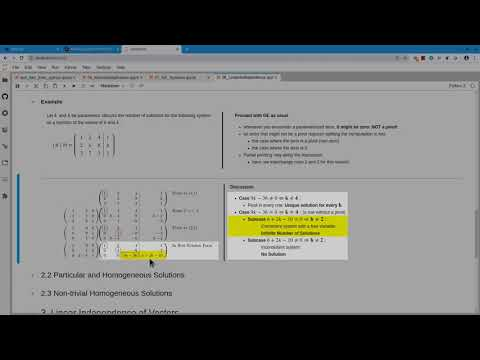

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("yXQkxM-itHY", 400, 200, frameborder="0",
      allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture",
      allowfullscreen=True)

# 1. Right Hand Sides $b$

<div>
<div>
Rewriting $A x = b$ in column view, we see<br><br>
$
\qquad b = x_1 a_1 + x_2 a_2 + \dots x_n a_n,
$
<br><br>
$\qquad$ where the vectors $a_i$ are the columns of $A$.
</div>

<div>
    <strong>Example: Consistent system when $b$ is in the span of the columns of $A$</strong><br><br>
<!--%%itikz --temp-dir --template standalone --tex-packages=amsmath-->
$\qquad\left( \begin{array}{cccc|c}
 1   & 2 & 1 & 1 &   b_1 \\
 3   & 1 & 4 & 1 &   b_2 \\
 2   & 0 & 1 & 2 &   b_3
\end{array} \right)
\qquad \Leftrightarrow \qquad
\begin{pmatrix} b_1 \\ b_2 \\ b_3 \end{pmatrix}
= x_1 \begin{pmatrix} 1 \\ 3 \\ 2 \end{pmatrix}
+ x_2 \begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix}
+ x_3 \begin{pmatrix} 1 \\ 4 \\ 1 \end{pmatrix}
+ x_4 \begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix} \; \Rightarrow \; b \in \textbf{span}\left\{\;
\begin{pmatrix} 1 \\ 3 \\ 2 \end{pmatrix},
\begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix},
\begin{pmatrix} 1 \\ 4 \\ 1 \end{pmatrix},
\begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix}
\;\right\}
$
</div><br><br></div>

If we allow the $x_i$ to take on **all possible values**, we see all the possible right hand sides $b$ such that $A x = b$ has a solution:
<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

**Theorem:** Let $A \in \mathbb{F}^{M \times N}$ have columns $a_1, a_2, \dots a_n$.<br>
$\qquad$ The system $A x = b$ is consistent iff $\;\; b \in \textbf{span} \left\{ a_1, a_2, \dots a_n \right\}.$
</div>

<strong style="height:100px;color:blue;font-size:18px;">What can we say about the span of the columns of $A$?</strong>
* The span of a set of vectors is a hyperplane through the origin,<br> $\qquad$ so $\mathbf{b}$ is in the **hyperplane through the origin:** $\;\; \textbf{span} \left\{ a_1, a_2, \dots a_n \right\} \subseteq \mathbb{F}^M.$

* We know that $A x = b$ is consistent when $A$ has a **pivot in every row**<br>
  $\qquad$ i.e., there is a solution for every possible right-hand side $b$<br>
   $\qquad$ $A$ has a **pivot in every row** $\;\;\Rightarrow\;\; \textbf{span} \left\{ a_1, a_2, \dots a_n \right\} = \mathbb{F}^M$ 

----
What if $A$ does not have a pivot in every row, i.e., $A$ reduces to a row echelon form with one or more rows of zeros?<br>
$\qquad$ Let's look at an example:

<!--
A=np.array( [[1, 2, 1, 2], [2, 1, 1, 1], [4, 5, 3, 5]] )
matrices = [[None, nM.str_rep_from_mats(A, ['b_1','b_2','b_3'])]]; pivots = []; txt=[]
E1 = np.array([[1,0,0],[-2,1,0],[-4,0,1]]) ; A1 = E1 @ A ;matrices.append([E1,nM.str_rep_from_mats(A1,['b_1','-2 b_1 + b_2','-4 b_1 + b_3'     ])]); pivots.append((1,1))
E2 = np.array([[1,0,0],[0,1,0],[0,-1,1]]) ;  A2 = E2 @ A1;matrices.append([E2,nM.str_rep_from_mats(A2,['b_1','-2 b_1 + b_2','-2 b_1 -b_2 + b_3'])]); pivots.append((2,2))
mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=1, pivots=pivots, txt=txt)

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs),
                            prefix='sol_rhs_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )

A2b = np.hstack( [A2, np.array([1,0,1]).reshape(-1,1)])
matrices = [[None, A2b]]; pivots = []; txt=[]
E2i = np.array([[1,0,0],[0,1,0],[0,1,1]]) ; A1b = E2i @ A2b;matrices.append([E2i,A1b])
E1i = np.array([[1,0,0],[2,1,0],[4,0,1]]) ; Ab  = E1i @ A1b;matrices.append([E1i,Ab])
mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_int_layout( matrices, Nrhs=1, pivots=pivots, txt=txt)

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs),
                            prefix='sol_rhs_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
-->
<!--div style="float:center;padding-left:1cm;" -->

<div style="float:left;height:3.3cm;"><img src="Figs/sol_rhs_1.svg" width="250"></div>
<div style="float:left;padding-left:0.5cm;margin-left:0.5cm;border-left:2px solid black;height:3.3cm;"><img src="Figs/sol_rhs_2.svg"  width="160"></div>

<div style="float:left;margin-left:0.5cm;padding-left:0.5cm;border-left:2px solid black;height:3.3cm;font-size:8pt;">

Start with an inconsistent system, and run the computation
    <strong><em>"backwards:"</em></strong> <br>
$\qquad$ the result is an inconsistent system

The vector $b = \begin{pmatrix}1 \\ 2 \\ 5 \end{pmatrix}$ is not in the span of the columns of $A$.
</div>

* $A x = b$ with parameterized right hand side
    * With a parameterized right hand side, we see that any rows of zeros yield a constraint on the $b$ vector:<br>
    we **have a solution** as long as there is no contradiction, i.e., provided that $\; \color{red}{\mathbf{-2 b_1 - b_2 + b_3 = 0}}$
    
    Thus, not every right-hand side in $\mathbb{R}^3$ is in the $\textbf{span}\left\{ \text{ columns of } A\right\},$ that we **recognize as a plane.**
* We could analyze the way the right-hand sides are modified, but it is much simpler to realize we can **undo the row operations:**<br>
$\qquad$ start with an inconsistant right-hand side<br>
$\qquad$ we obtain a vector $b$  such that $A x = b$ is inconsistent!<br><br>
$\qquad$ Since we can always do that, we see that<br>
$\qquad$ **if $A$ reduces to a matrix with one or more rows of zeros, there are always right-hand sides such that $A x = b$ is inconsistent.**

<div style="float:left;background-color:#F2F5A9;color:black;width:45%;padding:3mm;">

**Theorem:** Let $A \in \mathbb{F}^{M \times N}$ have a row echelon form with **a pivot in every row.**<br>
$\qquad$ The system $A x = b$ is **consistent for every right hand side**, i.e., for all $b \in \mathbb{F}^M.$
</div>
<div style="float:right;background-color:#F2F5A9;color:black;width:45%;padding:3mm;">

**Theorem:** Let $A \in \mathbb{F}^{M \times N}$ have a row echelon form with **one or more rows of zeros.**<br>
$\qquad$ The system $A x = b$ is **inconsistent for suitably chosen right-hand sides** $b \in \mathbb{F}^M.$
</div>

# 2. Solutions of $A x\ =\ b$

## 2.1 The Number of Solutions

**Review:**
* A system is consistent iff **all rows of zeros (if any)** in a row echelon form have **right-hand sides equal to zero**
* A consistent system has either a **unique solution** or an **infinite number of solutions**<br>
depending on the whether or not there are **free variables:**<br>
    * no free variables: **unique solution**
    * free variables: **infinite number of solutions**


#### **Example**

<div style="font-size:10pt;">
<div style="float:left;margin-left:0cm;padding-left:0.5cm;height:5.2cm;width:35%;">

Let $k$ and $h$ be parameters:<br>
$\quad$ discuss the number of solutions for the following system<br>
$\quad$ as a function of the values of $h$ and $k$:<br><br>
$\quad (A \mid b ) = \left( \begin{array}{rrr|r}
1 & 2 & 4 & 1 \\
2 & \color{red}k & 8 & \color{red}h \\
3 & 7 & 3 & 1
\end{array}\right)$
</div>
<div style="float:left;margin-left:0.5cm;padding-left:0.5cm;border-left:2px solid black;height:4.8cm;">

**Proceed with GE as usual**
* whenever you encounter a parameterized term, **it might be zero: NOT a pivot!**
* an entry that might not be a pivot requires splitting the computation in two:
    * the case where the term is a pivot (non-zero)
    * the case where the term is 0
* Partial pivoting may delay the discussion
    * here, we interchange rows 2 and 3 for this reason!
</div></div>

<!--
k = sym.Symbol('k'); h = sym.Symbol('h')
Ab = sym.Matrix([[1,2,4,1],[2,k,8,h],[3,7,3,1]]); matrices = [[None, Ab]]; pivots = []; txt=[]

E1=sym.eye(3);E1[1:,0]=[-2,-3]; A1=E1*Ab;                               matrices.append([E1,A1]); pivots.append((1,1));txt.append('Pivot at (1,1)')
E2=sym.eye(3);E2=E2.elementary_row_op('n<->m',row1=1,row2=2); A2=E2*A1; matrices.append([E2,A2]); pivots.append(None);txt.append('Rows 2 <-> 3')
E3=sym.eye(3);E3[2,1]=4-k; A3=E3*A2;                                    matrices.append([E3,A3]); pivots.append((2,2));txt.append('Pivot at (2,2)')
pivots.append((3,3)); txt.append('In Row Echelon Form')
mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=1, pivots=pivots, txt=txt, formater=lambda x: sym.latex(x))

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='sol_rhs_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
-->
----
<div style="float:left;padding-left:0.0cm;padding-right:0.5cm;margin-left:0.5cm;height:6.6cm;"><br><img src="Figs/sol_with_parameters.svg" width="450"></div>
<div style="float:left;margin-left:0cm;padding-left:0.5cm;border-left:2px solid black;height:6.6cm;">

**Discussion**
* **Case $9 k -36 \ne 0 \Leftrightarrow \mathbf{k \ne 4}:$**
    * Pivot in every row: **Unique solution for every $\mathbf{h}$**
* **Case $9 k -36 = 0 \Leftrightarrow \mathbf{k = 4}:$** (a row without a pivot)
    * **Subcase** $h+2 k -10 = 0 \Rightarrow \mathbf{h = 2}:$<br>
    $\qquad$ Consistent system with a free variable:<br>
    $\qquad$ **Infinite Number of Solutions**
    * **Subcase** $h+2 k -10 \ne 0 \Rightarrow \mathbf{h \ne 2}:$<br>
    $\qquad$ Inconsistent system:<br>
    $\qquad$ **No Solution**

## 2.2 Particular and Homogeneous Solutions

Gaussian Elimination shows that **the solutions $\mathbf{x}$ of $\mathbf{A x = b}$ take the form**
$
\mathbf{x = x_p + \alpha_1 x_{h 1} + \alpha_2 x_{h 2} + \dots \alpha_k x_{h k},}
$<br>
$\qquad$ where $k$ is the number of free variables in the system,<br>
$\qquad$ and $\alpha_1, \alpha_2, \dots \alpha_k$ are arbitrary parameters.

To further analyze this solution, we need

<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

$\qquad$ **Theorem:** Let $A$ be a matrix in $\mathbb{F}^{M \times N}$, let $x$ and $y$ be any vectors in $\mathbb{F}^N$ and let $\alpha$ be any scalar in $\mathbb{F}$.<br>
$\qquad$     $\qquad$ Then
    $\left\{ \begin{align} A ( x + y ) &= A x + A y \\
                   A ( \alpha x) &= \alpha A x
     \end{align} \right.$
</div>

Let $x = x_p + \alpha_1 x_{h 1} + \alpha_2 x_{h 2} + \dots \alpha_k x_{h k}$ be the full solution of $A x = b$
* Since $x$ above is a solution for any choice of the parameters $\alpha_i$ , **the vector $\mathbf{x_p}$ is a solution of** $A x = b, \text{ i.e., } A x_p = b :$<br>
$\qquad$ just set the $\alpha_i = 0.$
* Consider $A (x - x_p) = A x - A x_p = b - b = 0.$ Thus the part of the solution<br>$\qquad$  $\mathbf{x_h = \alpha_1 x_{h 1} + \alpha_2 x_{h 2} + \dots \alpha_k x_{h k}}$ **is the solution of** $\mathbf{A x = 0}$.

<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

**Definition:** Let $A x = b$ be a linear system of equations with $A \in \mathbb{F}^{M \times N}, b \in \mathbb{F}^N$,<br>
    $\qquad$ with solution
    $\color{red}{x = x_p + x_h}$,
    $\;$ where $\; \color{red}{x_h = \alpha_1 x_{h 1} + \alpha_2 x_{h 2} + \dots \alpha_k x_{h k}}$<br>
    $\qquad$ for some given vectors $x_p, x_{h 1}, x_{h 2} \dots x_{h k}.$
* Any one solution of $A x = b,$ (in particular $x_p$) is a **particular solution** of $A x = b.$
* The remaining part $x_h$ is the **homogeneous solution** of the **homogeneous system** $A x = 0$.   
* The zero vector $x = 0$ is the **trivial solution** of the homogeneous system $A x = 0.$
</div>

#### **Example**

In section Section 2.2 of the previous lecture, we found the **solutions** of an $\mathbf{A x = b}$ problem with **free variables** $\mathbf{x_3}$ and $\mathbf{x_5}$ to be
<div style="font-size:10pt;">
<div style="float:left;width:40%;height:6.2cm;font-size:10pt;">

<br>
$\quad \left( \begin{array}{r} x_1\\x_2\\ \color{red}{x_3}\\x_4\\ \color{red}{ x_5 }\end{array}\right)
= \left( \begin{array}{r}  1 \\ -1 \\ \color{red}0 \\ 2 \\ \color{red}0 \end{array}\right)
+ \alpha \left( \begin{array}{r} -1 \\  1 \\ \color{red}1 \\ 0 \\ \color{red}0 \end{array}\right)
+ \beta  \left( \begin{array}{r}  2 \\ -2 \\ \color{red}0 \\ 2 \\ \color{red}1 \end{array}\right)$

</div>
<div style="float:left;padding-left:0.5cm;width:55%;text-align:left;height:6.2cm;border-left:2px solid black;">

The free variables were $x_3$ and $x_5$, set to $\color{red}{x_3 = \alpha}$ and $\color{red}{x_5 = \beta}$ respectively,<br>$\qquad$ and are shown in red.

The solution has the form $\mathbf{x = x_p + x_h}$
* where the **particular solution** $\mathbf{x_p}$ of $A x = b$ is obtained by setting<br>$\qquad$ $\color{red}{x_3 = \alpha =0}$ and $\color{red}{x_5=\beta=0}$ in $x$.
* and each of the two constant vectors of the homogeneous solution<br>$\qquad$ $x_h = \alpha\ x_{h 1} + \beta\ x_{h 2}$ of $A x = 0$ is obtained by setting<br>
    $\qquad$ $\color{red}{x_3=\alpha=1, x_5=\beta=0},$ and $\color{red}{x_3=\alpha=0, x_5=\beta=1}$<br>
    $\qquad$ in $x_h$ respectively.
</div></div>

----
<div style="float:left;height:4cm;">

**Notice the pattern of the entries**
* Setting $\color{red}{\alpha = \beta = 0}$ yields the constant solution $x_p,$<br>
i.e., the **free variables in the particular solution $x_p$ are zero!**
* The free variables in $x_{h 1}$ are $\alpha = 1, \beta = 0$ (the **first column** of $I_2$)
* The free variables in $x_{h 2}$ are $\alpha = 0, \beta = 1$ (the **second column** of $I_2$)
</div>
<div style="float:left;padding-left:2cm;height:4cm;">

**Note: with $k$ free variables we would see the columns of $I_k$**
* $A x = 0$ has solution $x_h = \alpha_1\ x_{h 1} + \alpha_2 \ x_{h 2}+ \dots + \alpha_k x_{h k}$
    * we get the solution $x_{h 1}$ by setting $\alpha_1 = 1, \alpha_i = 0 \text{ for } i=2,3, \dots k$
    * we get the solution $x_{h 2}$ by setting $\alpha_2 = 1, \alpha_i = 0 \text{ for } i=1,3,4, \dots k$
    * the same pattern holds for all additional free variables
</div>

**Remarks:**
* every right hand side $b$ in the hyperplane $\textbf{span} \left\{ \text{ columns of } A \right\} \subseteq \mathbb{F}^M,$<br>
there is a set of solutions  $x = x_p + x_h,$  a **hyperplane** $\left\{ x_h \right\} \subseteq \mathbb{F}^N$ **pushed away from the origin** by $x_p.$
* when $A x$ has no free variables, i.e., when $A$ has a **pivot in every column**, the homogeneous solution is the **trivial solution** $\mathbf{x_h = 0.}$

## 2.3 Non-trivial Homogeneous Solutions

<!-- A=np.array( [[1, 2, 1, 2], [2, 1, 1, 1], [4, 5, 3, 5]] );
E1=np.array([[1,-2,-4],[0,1,0],[0,0,1]]).T; A1=E1 @ A;

E2=np.array([[1,0,0],[0,1,-1],[0,0,1]]).T; A2=E2 @ A1; A2
x=(0*np.array([[-1,-1,3,0]])+0*np.array([[1,-1,0,1]])).T
A @ x -->
To understand the homogeneous solution better, we need to look at $A x = 0$ in column view.

$\qquad$ Let $A = \left( a_1 \mid a_2 \mid \dots \mid a_k \right).$  Then
$$
x_1 \big( a_1 \big) + x_2 \big( a_2 \big) + \dots x_n \big( a_k \big) = \big( 0 \big)
$$

$\qquad$ If there is a non-zero solution, e.g., if $x_1 \ne 0$, we can solve for the associated vector:<br><br>
$$
\big( a_1 \big) = -\frac{x_2}{x_1} \big( a_2 \big) -\dots --\frac{x_k}{x_1} \big( a_k \big) 
$$

<br><br>
$\mathbf{\therefore}\quad$ <strong style="height:100px;color:darkblue;font-size:18px;">The homogeneous problem has a non-zero solution iff some column of $\mathbf{A}$</strong><br>
    $\qquad\qquad$  <strong style="height:100px;color:darkblue;font-size:18px;">can be written as a linear combination of the other columns.</strong>

#### **Example:**

> $$
\begin{pmatrix} 1 & 2 & 1 & 3 \\ 2 & 1 & 1 & 3 \\ 4 & 5 & 3 & 9 \end{pmatrix} 
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}
\quad \Leftrightarrow \quad
x_1 \begin{pmatrix} 1 \\ 2  \\ 4 \end{pmatrix} +
x_2 \begin{pmatrix} 2 \\ 1  \\ 5 \end{pmatrix} +
x_3 \begin{pmatrix} 1 \\ 1  \\ 3 \end{pmatrix} +
x_4 \begin{pmatrix} 3 \\ 3  \\ 9 \end{pmatrix} =
\begin{pmatrix}0 \\ 0 \\ 0 \end{pmatrix}
$$
> 
> Plugging in a particular solution $x = (-1,-1,0,1)$, we see that
> $$
-1 \begin{pmatrix} 1 \\ 2  \\ 4 \end{pmatrix} -
1 \begin{pmatrix} 2 \\ 1  \\ 5 \end{pmatrix} +
0 \begin{pmatrix} 1 \\ 1  \\ 3 \end{pmatrix} +
1 \begin{pmatrix} 3 \\ 3  \\ 9 \end{pmatrix} =
\begin{pmatrix}0 \\ 0 \\ 0 \end{pmatrix}
$$
>
> Solving for the second vector for example, we see that
> $$
\begin{pmatrix} 2 \\ 1  \\ 5 \end{pmatrix} =
-1 \begin{pmatrix} 1 \\ 2  \\ 4 \end{pmatrix} +
0 \begin{pmatrix} 1 \\ 1  \\ 3 \end{pmatrix} +
1 \begin{pmatrix} 3 \\ 3  \\ 9 \end{pmatrix}
$$

# 3. Linear Independence of Vectors

## 3.1 Definition and Theorem

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A set of vectors $\left\{ v_1, v_2, \dots v_k \right\}$ is **linearly dependent**<br>
    $\qquad$ iff the equation $\alpha_1 v_1 + \alpha_2 v_2 + \dots + \alpha_k v_k = 0$ has **non-zero solutions** for $\alpha_1, \alpha_2, \dots \alpha_k$.<br><br>
    $\qquad$ If the equation has only the **trivial solution** $\alpha_1 = 0, \alpha_2 = 0, \dots \alpha_k = 0$, the set of vectors is **linearly independent**
</div>

**Remark:** If we assemble the vectors in a matrix $A$ as **columns:**  $A = \left( v_1 \mid v_2 \mid \dots \mid v_k \right)$<br>
$\qquad$ and the variables in a vector $x = \left( \alpha_1, \alpha_2, \dots \alpha_k \right),$<br>
$\qquad$ we recover our initial motivation for this definition:<br><br>
$\qquad$ **the set of vectors is linearly independent iff $\mathbf{A x = 0}$ has only the trivial solution** $\mathbf{x = 0,}$<br>
$\qquad$ i.e., the solution $x = 0$ is unique.

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** A set of vectors $\left\{ v_1, v_2, \dots v_k \right\} \subset \mathbb{F}^M$ is **linearly independent**<br>
    $\qquad$ iff the system $\left( v_1 \mid v_2 \mid \dots \mid v_k \right) x = 0$ has **only the trivial solution** $x=0$,<br>
    $\qquad$ i.e., iff the matrix $\left( v_1 \mid v_2 \mid \dots \mid v_k \right)$ has a pivot in every column
</div>

## 3.2 Examples

### 3.2.1 General Case

#### **Linearly Independent Vectors**

<div style="float:left;width:30%;font-size:10pt;margin-right:0.5cm;";>
Are the following vectors linearly dependent?<br><br>

$$\begin{align}
v_1 & = \begin{pmatrix}\;\;2 & 2 & -4 &  \;\;3 \end{pmatrix}  \\
v_2 & = \begin{pmatrix}\;\;2 & 3 & -3 &  \;\;1 \end{pmatrix}  \\
v_3 & = \begin{pmatrix} -2 & 0 & \;\; 7 & -6 \end{pmatrix}  \\
v_4 & = \begin{pmatrix}\;\;4 & 5 & -3 & \;\; 9 \end{pmatrix}  \\
\end{align}
$$
</div>

<!--
A=sym.Matrix([[2,0,0,0],[2,1,0,0],[-4,1,1,0],[3,-2,1,1]])*sym.Matrix([[1,1,-1,2],[0,1,2,1],[0,0,1,4],[0,0,0,1]]); matrices = [[None, A]]; pivots = []; txt=[]
E1=sym.eye(4);E1[1:,0]=-A[1:,0]/A[0,0];A1=E1*A;   matrices.append([E1,A1]); pivots.append((1,1))
E2=sym.eye(4);E2[2:,1]=-A1[2:,1]/A1[1,1];A2=E2*A1;matrices.append([E2,A2]); pivots.append((2,2))
E3=sym.eye(4);E3[3:,2]=-A2[3:,2]/A2[2,2];A3=E3*A2;matrices.append([E3,A3]); pivots.append((3,3))
pivots.append((4,4))

mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=0, pivots=pivots, txt=txt, formater=lambda x: sym.latex(x))

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
             mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='lin_dep_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
-->
<div style="float:left;padding-left:1cm;height:11cm;width:60%;border-left:2px solid black;">   
 
Write the vectors into a matrix **as columns**, and reduce to row echelon form.

<img src="Figs/lin_dep_1.svg" width="280">

<br><br>
Since there is a pivot in every column, the vectors are **linearly independent.**
</div>

#### **Linearly Dependent Vectors**

<div style="float:left;margin-left:0cm;padding-left:0cm;font-size:8pt;"><!-- height:4.3cm;" -->
Are the following vectors linearly dependent?
$$\begin{align}
v_1 & = \begin{pmatrix}\;\;4 & 2 &\;\; -8 &  \;\;6 \end{pmatrix}  \\
v_2 & = \begin{pmatrix}\;\;6 & 3 & -12 &  \;\;9 \end{pmatrix}  \\
v_3 & = \begin{pmatrix} -2   & 1 & \;\;\;\; 6 & -7 \end{pmatrix}  \\
v_4 & = \begin{pmatrix}\;\;4 & 3 & \;\;-7 & \;\; 4 \end{pmatrix}  \\
\end{align}
$$
</div>

<!--
A=sym.Matrix([[2,0,0,0],[1,1,0,0],[-4,1,1,0],[3,-2,1,1]])*sym.Matrix([[2,3,-1,2],[0,0,2,1],[0,0,0,0],[0,0,0,0]]); matrices = [[None, A]]; pivots = []; txt=[]
E1=sym.eye(4);E1[1:,0]=-A[1:,0]/A[0,0];A1=E1*A;   matrices.append([E1,A1]); pivots.append((1,1))
E2=sym.eye(4);E2[2:,1]=-A1[2:,2]/A1[1,2];A2=E2*A1;matrices.append([E2,A2]); pivots.append((2,3))

mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=0, pivots=pivots, txt=txt, formater=lambda x: sym.latex(x))

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='lin_dep_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_dir="." )
-->
<div style="float:left;margin-left:0.5cm;padding-left:0.5cm;border-left:2px solid black;height:8.7cm;font-size:8pt;">

Write the vectors into a matrix **as columns**,<br>$\qquad$ and reduce to row echelon form.

<img src="Figs/lin_dep_2.svg">

<br><br>
Since there is not a pivot in every column,<br>$\quad$ the vectors are **linearly dependent**.
    
</div>
<div style="float:left;margin-left:0.5cm;padding-left:0.5cm;border-left:2px solid black;height:8.7cm;font-size:8pt;">
  
**Remark: We can choose a subset of linarly independent vectors**
* the vectors $v_1$ and $v_3$ have pivots: they are **linearly independent**
* the vectors $v_1$ and $v_4$ have pivots: they are **linearly independent**
* the vectors $v_2$ and $v_4$ have pivots: they are **linearly independent**
</div>

### 3.2.2 Special Cases

#### **The Set of Vectors Includes the Zero Vector**

<div style="float:left;margin-left:1cm;padding-left:1cm;">

Consider the vectors
$$
v_1 = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix},\;
v_2 = \begin{pmatrix} 5 \\ 2 \\ 3 \end{pmatrix},\;
v_3 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}
$$

</div>
<div style="float:left;margin-left:1cm;padding-left:1cm;border-left:2px solid black;height:4.6cm;">

The set of vectors is **linearly dependent** since we can multiply the zero vector by a nonzero constant:
$$
\begin{align}
& {\color{red}{\alpha_1}} \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}
+ {\color{red}{\alpha_2}} \begin{pmatrix} 5 \\ 2 \\ 3 \end{pmatrix}
+ {\color{red}{\alpha_3}} \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} & = 0 & \;\; \text{ has non-zero solutions, e.g., } & \\
&  {\color{red}{\; 0}}    \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}
+ {\color{red}{\;0}}\    \begin{pmatrix} 5 \\ 2 \\ 3 \end{pmatrix}
+ {\color{red}{\;1}}    \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} & = 0 & &
\end{align}$$
</div>

#### **The Matrix has a Triangular Submatrix**

<div style="float:left;margin-left:1cm;padding-left:1cm;">

Consider the vectors
$$
v_1 = \begin{pmatrix} 1 \\ \color{red}2 \\ \color{red}5 \\ \color{red}3 \\ 1 \end{pmatrix},\;
v_2 = \begin{pmatrix} 1 \\ \color{red}0 \\ \color{red}3 \\ \color{red}8 \\ 9 \end{pmatrix},\;
v_3 = \begin{pmatrix} 5 \\ \color{red}0 \\ \color{red}0 \\ \color{red}3 \\ 2 \end{pmatrix}
$$

</div>
<div style="float:left;margin-left:1cm;padding-left:1cm;border-left:2px solid black;height:4.0cm;">
  
The set of vectors is **linearly independent:** Look at rows 2, 3 and 4
$$
\alpha_1 \begin{pmatrix} 1 \\ \color{red}2 \\ \color{red}5 \\ \color{red}3 \\ 1 \end{pmatrix} +
\alpha_2 \begin{pmatrix} 1 \\ \color{red}0 \\ \color{red}3 \\ \color{red}8 \\ 9 \end{pmatrix} +
\alpha_3 \begin{pmatrix} 5 \\ \color{red}0 \\ \color{red}0 \\ \color{red}3 \\ 2 \end{pmatrix} = 0
\quad \Rightarrow \left\{ \begin{align}
&2 \alpha_1 & = 0 \\
& 5 \alpha_1 + 3 \alpha_2 & = 0 \\
& 3 \alpha_1 + 8 \alpha_2 + 3 \alpha_2 & = 0
\end{align} \quad \right\} \quad \Rightarrow \quad \alpha_1 = \alpha_2 = \alpha_3 = 0.
$$
</div>

#### **The Vectors are Obviously Linearly Dependent**

<div style="float:left;margin-left:1cm;padding-left:1cm;">

Consider the vectors
$$
v_1 = \begin{pmatrix} 1 \\ 2 \\ 3 \\ 4 \end{pmatrix},\;
v_2 = \begin{pmatrix} 5 \\ 2 \\ 3 \\ 2 \end{pmatrix},\;
v_3 = \begin{pmatrix} 11 \\ 6 \\ 9 \\ 8 \end{pmatrix},\;
v_4 = \begin{pmatrix} 1 \\ 2 \\ 3 \\ 4 \end{pmatrix},\;
$$

</div>
<div style="float:left;margin-left:1cm;padding-left:1cm;border-left:2px solid black;height:3.5cm;width:10cm;">

The vectors are **linearly dependent**
* Notice $\mathbf{v_3 = v_1 + 2 v_2} \Rightarrow  v_1 + 2 v_2 - v_3 + 0 v_4 = 0$
* Notice $\mathbf{v_4 = v_1}  \qquad\;\  \Rightarrow  v_1 + 0 v_2 + 0 v_3 - v_4 = 0$
</div>

#### **More Vectors than Entries in a Vector**

<div style="float:left;margin-left:0.5cm;padding-left:0.5cm;padding-right:0.5cm;">

Consider the vectors
$$
v_1 = \begin{pmatrix} 1 \\ 2 \\ 3  \end{pmatrix},\;
v_2 = \begin{pmatrix} 5 \\ 2 \\ 3  \end{pmatrix},\;
v_3 = \begin{pmatrix} 2 \\ 6 \\ 8 \end{pmatrix},\;
v_4 = \begin{pmatrix} 1 \\ 8 \\ 3 \end{pmatrix}
$$

</div>
<div style="float:left;margin-left:1cm;padding-left:1cm;border-left:2px solid black;height:4.8cm;width:20cm;">

The vectors are **linearly dependent** since the matrix<br><br>
$
\left( v_1 \mid v_2 \mid v_3 \mid v_4 \right) = \begin{pmatrix} 1 & 5 & 2 & 1\\ 2 & 2 & 6 & 8 \\ 3 & 3 &8 & 3 \end{pmatrix} \quad$ has at most 3 pivots (one per row), but 4 columns}


Therefore, **there must be at least one column without a pivot**
</div>

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $S = \left\{\; v_1, v_2,... v_N \; \right\}$ be set of $N$ vectors in $\mathbb{F}^M$.<br>
    $\qquad$ If $N > M$ (i.e., more vectors than entries in a vector), then the set $S$ is **linearly dependent.**
</div>

#### **Homogeneous Solution Vectors**

The **homogeneous solution vectors** obtained by backsubstitution are **linearly independent:**<br>
$\qquad$ they contain successive columns of $I$ by construction.

# 4. Take Away

* We have found a number of **hyperplanes associated with** $\mathbf{A x = b}$
    * The set of vectors $b$ for which $A x = b$ is consistent is a hyperplane through the origin
        * the equation is consistent for any $b \in \mathbb{F}^N$ iff a row-echelon form of $A$ has a pivot in every row
        * otherwise, the equation is inconsistent for some $b$
    * The solution for a consistent set of equations $A x = b$ has the form $x = x_p + x_h$
        * $x_p$ is a **particular solution** of $\mathbf{A x = b}$
        * $x_h = \alpha_1 x_{h 1} + \alpha_2 x_{h 2} + \dots \alpha_k x_{h k}$ are the **homogeneous solution** of $\mathbf{A x = 0,}$<br>
        $\qquad$ and $k$ are the number of free variables

* We found a relationship between vectors that will play a central role: **linearly independent vectors**
    * a set of vectors is **linearly dependent** iff some vector in the set can be obtained as a linear combination of the others.
    * the set of vectors is **linearly independent** otherwise